In [84]:
import numpy as np
import pandas as pd
import pickle 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.feature_selection import RFE

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Scaling the data
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

#Shap
import shap

In [85]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_row',None)

In [86]:
post_meno = pd.read_csv("D:/SASTRA_AI_DS/MIni_project/Ovarian_Cancer_Diagnosis/Notebook/Spliting_data/data_post_meno.csv")

In [87]:
post_meno

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,6.920000,23.980000,61,39.9,95.0000,9.0,13.0,0.02,0.30,3.21,2.620000,219.8089,19.98000,12.120030,2.460000,100.1,22.3,45.0,2.6,0.040000,0.500000,13.000000,32.1,7.170469,0.417,126.071034,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1,0.82,0.41,5.50,10.00,142.0,76.500000,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2,0
1,2.750000,16.600000,45,39.2,26.0000,16.0,17.0,0.05,0.74,5.27,2.350000,219.8089,18.41000,12.120030,0.820000,103.2,24.0,65.7,2.9,0.000000,0.070000,17.000000,26.9,4.760000,0.372,126.071034,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1,1.11,0.42,6.55,7.38,139.1,65.500000,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6,0
2,3.030000,24.050000,76,50.4,76.0000,16.0,23.0,0.04,0.50,5.05,2.680000,39.8300,1.97000,3.710966,3.450000,103.5,21.9,68.0,2.3,0.183434,3.157338,17.000000,26.6,5.670000,0.437,126.071034,140.0,5.1,4.75,1.79,20.5,30.4,94.8,1,0.86,0.37,4.20,12.00,144.7,70.900000,0.24,15.1,1.17,205.0,4.61,12.8,7.4,77.0,334.2,0
3,4.000000,23.290000,63,44.6,71.0000,14.0,23.0,0.01,0.20,4.90,2.350000,16.6500,58.78746,3.957770,2.190000,104.0,23.0,74.0,1.9,0.010000,0.200000,18.000000,25.2,5.500000,0.377,96.470000,119.0,4.2,4.33,0.89,18.2,30.1,95.4,1,0.88,0.36,7.40,8.90,141.6,74.000000,0.19,8.8,1.38,215.0,3.95,14.9,6.1,69.8,325.2,0
4,6.467504,16.060000,65,45.6,128.8215,32.0,16.0,0.04,0.70,2.25,2.630000,219.8089,58.78746,12.120030,3.427377,106.6,28.5,49.0,1.4,0.020000,0.300000,38.239033,34.0,4.940000,0.396,126.071034,123.0,3.0,4.26,1.30,22.2,28.4,91.5,1,1.01,0.35,6.00,9.70,146.9,70.800000,0.30,10.4,1.04,306.0,4.33,12.3,4.4,79.6,234.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.270000,19.620000,65,41.3,73.0000,16.0,23.0,0.03,0.70,5.23,2.710000,8.5400,4.31000,3.728220,2.770000,103.0,22.2,72.0,3.2,0.120000,2.600000,24.000000,33.1,6.140000,0.400,61.080000,135.0,5.9,4.32,1.02,22.5,29.7,87.9,1,0.91,0.20,4.40,9.80,140.5,69.815125,0.20,10.2,1.10,200.0,4.55,13.5,9.1,74.4,294.0,1
115,5.840000,22.800000,50,45.4,55.0000,18.0,19.0,0.06,0.60,5.49,2.630000,5.1200,5.32000,3.627316,1.900000,101.4,23.1,56.0,3.5,0.130000,1.300000,8.000000,25.5,5.540000,0.374,41.340000,123.0,7.2,4.00,1.30,12.7,31.6,96.1,1,0.95,0.38,3.70,11.20,143.3,81.714560,0.24,13.1,1.11,214.0,3.89,11.8,10.7,70.9,266.7,1
116,4.890000,9.500000,67,44.0,76.0000,13.0,24.0,0.04,0.60,5.86,1.891785,15.0600,32.68000,4.338559,4.040000,101.5,24.5,51.0,2.7,0.080000,1.300000,12.000000,30.9,6.110000,0.421,55.230000,132.0,6.5,4.30,1.69,27.1,28.8,91.7,1,1.00,0.32,5.10,12.60,143.0,65.911381,0.18,17.6,1.24,141.0,4.59,13.6,9.2,74.9,240.3,1
117,6.467504,8.789439,58,45.7,83.0000,12.0,14.0,0.01,0.20,5.31,1.891785,17.7200,28.08000,3.999032,3.710000,102.5,19.9,73.0,3.4,0.100000,1.700000,15.000000,34.2,5.390000,0.432,54.940000,154.0,7.4,4.15,1.48,25.9,30.2,89.0,1,0.92,0.25,4.40,11.80,144.2,67.789084,0.22,16.9,0.93,187.0,5.10,12.4,10.8,79.9,373.4,1


In [88]:
post_meno = post_meno.drop('Menopause', axis=1)

In [89]:
post_meno.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,3.070126,19.323823,61.563025,39.938087,86.336441,17.338538,20.985597,0.026247,0.414107,4.432281,2.405015,139.453386,24.155427,7.024250,2.011102,100.941123,24.785714,65.284933,2.939334,0.057145,0.962997,20.826441,30.491142,5.565529,0.386573,102.763710,125.979876,5.843714,4.389832,1.418609,23.252605,29.157209,89.704590,0.980191,0.368529,5.544524,10.128235,141.504991,69.703885,0.263853,13.901933,1.133897,264.070266,4.319221,13.116244,8.826144,70.528813,260.290403,0.193277
std,1.588607,4.972510,8.101725,6.000595,22.294641,7.959154,6.655920,0.018100,0.292702,1.417832,0.246763,92.526047,21.312187,3.970055,1.218006,3.163206,2.964459,12.568811,1.155304,0.046654,0.835982,9.395723,4.555219,0.932032,0.042472,33.877112,14.589571,2.625016,0.424190,0.535260,10.543899,1.901100,4.739742,0.122205,0.143498,1.545389,1.749887,2.946913,11.657738,0.080051,3.243219,0.187153,85.578542,0.487469,1.221293,3.705187,7.163264,68.699932,0.396538
min,0.700000,8.789439,36.000000,26.877457,26.000000,5.000000,10.000000,0.000000,0.000000,1.120000,1.891785,3.750000,0.600000,0.860000,0.200000,93.338730,16.200000,42.000000,1.100000,0.000000,0.000000,7.000000,18.550000,3.820000,0.285700,32.180000,91.417547,1.900000,3.330000,0.350000,3.900000,23.962632,76.546140,0.700000,0.130000,1.940000,5.890000,132.493900,37.200000,0.107000,8.800000,0.640000,98.000000,3.169092,11.370000,3.400000,53.971455,108.700000,0.000000
25%,1.890000,17.210000,57.000000,35.950000,70.500000,11.500000,16.000000,0.010000,0.200000,3.385000,2.295000,28.695000,6.700000,3.698151,1.000000,99.100000,22.550000,56.000000,2.100000,0.020000,0.300000,13.500000,27.400000,4.795000,0.367500,60.725000,120.000000,3.950000,4.150000,1.080000,15.550000,28.150000,87.150000,0.895000,0.255000,4.500000,9.250000,139.500000,63.050000,0.210000,11.100000,1.020000,203.500000,4.015000,12.300000,6.000000,66.300000,211.600000,0.000000
50%,2.660000,20.090000,61.000000,41.100000,84.000000,16.000000,20.000000,0.020000,0.400000,4.370000,2.460000,219.808900,15.020000,5.911146,1.840000,101.600000,24.500000,65.000000,2.700000,0.050000,0.700000,17.000000,30.700000,5.410000,0.390000,126.071034,126.000000,5.300000,4.380000,1.350000,23.500000,29.200000,89.800000,0.960000,0.350000,5.400000,10.200000,142.100000,69.815125,0.250000,13.400000,1.130000,254.000000,4.330000,12.900000,8.400000,72.000000,263.800000,0.000000
75%,3.815000,23.050000,66.500000,44.900000,98.500000,22.000000,24.000000,0.040000,0.600000,5.485000,2.580000,219.808900,43.642583,12.087078,2.890000,102.800000,27.300000,72.000000,3.450000,0.080000,1.400000,27.000000,33.550000,6.130000,0.412500,126.071034,135.500000,7.350000,4.640000,1.725000,29.000000,30.500000,92.850000,1.045000,0.435000,6.300000,11.200000,143.550000,77.950000,0.310000,16.600000,1.245000,321.000000,4.665000,13.400000,10.450000,75.850000,306.350000,0.000000
max,6.920000,26.380000,83.000000,50.600000,128.821500,32.791230,34.791230,0.074478,1.289561,7.076899,2.820000,219.808900,58.787460,12.120030,4.200000,108.100000,31.400000,95.768990,6.013465,0.183434,3.157338,38.239033,42.798639,7.170469,0.482000,167.100000,159.000000,12.171710,5.400000,3.012254,49.300000,33.300000,101.453900,1.281346,0.700000,10.189150,14.350000,147.900000,92.000000,0.462390,22.500000,1.653

In [90]:

# Modify column names by removing the hyphen and replacing with an empty string or other text
post_meno.columns = post_meno.columns.str.replace('-', '')  # Remove hyphen, e.g. CA72-4 becomes CA724
post_meno.columns = post_meno.columns.str.replace('%','1')
post_meno.columns = post_meno.columns.str.replace('#','')

In [91]:
X= post_meno.drop("TYPE",axis=1)
y= post_meno["TYPE"]

In [92]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
1    96
0    23
Name: count, dtype: int64

In [93]:
post_meno['TYPE'].value_counts()

TYPE
0    96
1    23
Name: count, dtype: int64

In [94]:
X.shape

(119, 48)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

# Standardization

In [96]:
scaler= StandardScaler()  
xs= scaler.fit_transform(X)

In [36]:
xs.shape

(119, 48)

# Classification models and metrics define

In [37]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()
dt = DecisionTreeClassifier() 

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(eval_metric='logloss')

In [38]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef),
        'f1-score': make_scorer(f1_score)
        }

# Performance of classifiers on all features

In [121]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            53.450460
score_time           9.793622
test_accuracy       94.090909
test_recall         98.888889
test_specificity    75.000000
test_gmean          84.821480
test_roc            86.944444
test_precision      94.181818
test_mcc            80.520157
test_f1-score       96.416040
dtype: float64

In [122]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            68.153479
score_time           4.414711
test_accuracy       95.757576
test_recall         98.888889
test_specificity    83.333333
test_gmean          89.343729
test_roc            91.111111
test_precision      96.272727
test_mcc            86.837498
test_f1-score       97.409258
dtype: float64

In [64]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time              0.710497
score_time          111.276386
test_accuracy        83.181818
test_recall          21.666667
test_specificity     97.888889
test_gmean           32.067153
test_roc             59.777778
test_precision       40.000000
test_mcc             25.288316
test_f1-score        27.333333
dtype: float64

In [65]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.950036
score_time          10.284023
test_accuracy       84.015152
test_recall         23.333333
test_specificity    98.888889
test_gmean          34.057774
test_roc            61.111111
test_precision      50.000000
test_mcc            30.449548
test_f1-score       31.666667
dtype: float64

In [66]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             7.326257
score_time          11.424599
test_accuracy       89.015152
test_recall         66.666667
test_specificity    94.444444
test_gmean          73.800624
test_roc            80.555556
test_precision      73.333333
test_mcc            63.413193
test_f1-score       67.333333
dtype: float64

In [67]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            96.199002
score_time           8.743360
test_accuracy       91.666667
test_recall         88.333333
test_specificity    92.666667
test_gmean          89.882748
test_roc            90.500000
test_precision      77.500000
test_mcc            77.237900
test_f1-score       81.857143
dtype: float64

# RFECV 

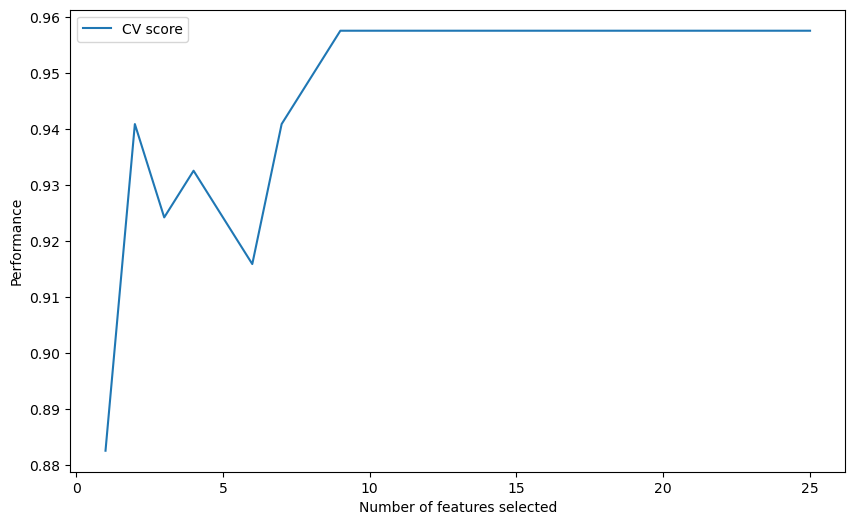

Column names of the best features:
Index(['AG', 'ALB', 'BUN', 'CA125', 'CA19-9', 'CL', 'CREA', 'DBIL', 'GLO',
       'GLU.', 'HE4', 'IBIL', 'Na', 'PCT', 'PHOS', 'TP'],
      dtype='object')


In [123]:
rfecv = RFECV(estimator=xg, step=2, cv=10, scoring='accuracy')

# Fit the RFECV object to the data
rfecv.fit(X, y)

# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# Get the column names of the best features
best_features = X.columns[rfecv.support_]

# print the column names of the selected features
print("Column names of the best features:")
print(best_features)

In [124]:
# best_features= ['AG', 'BUN', 'CA125', 'CA19-9', 'CL', 'DBIL', 'GLO', 'GLU.', 'HE4',
#        'IBIL', 'LYM#', 'PCT', 'RDW']
best_features = ['AG', 'ALB', 'BUN', 'CA125', 'CA19-9', 'CL', 'CREA', 'DBIL', 'GLO',
       'GLU.', 'HE4', 'IBIL', 'Na', 'PCT', 'PHOS', 'TP']
x_rfecv = X[best_features]
xs= scaler.fit_transform(x_rfecv)
x_rfecv

,AG,ALB,BUN,CA125,CA19-9,CL,CREA,DBIL,GLO,GLU.,HE4,IBIL,Na,PCT,PHOS,TP
0,23.980000,39.9,3.21,219.8089,19.98000,100.1,45.0,2.6,32.1,7.170469,126.071034,4.2,142.0,0.30,1.09,72.0
1,16.600000,39.2,5.27,219.8089,18.41000,103.2,65.7,2.9,26.9,4.760000,126.071034,8.0,139.1,0.25,1.25,66.1
2,24.050000,50.4,5.05,39.8300,1.97000,103.5,68.0,2.3,26.6,5.670000,126.071034,5.1,144.7,0.24,1.17,77.0
3,23.290000,44.6,4.90,16.6500,58.78746,104.0,74.0,1.9,25.2,5.500000,96.470000,4.2,141.6,0.19,1.38,69.8
4,16.060000,45.6,2.25,219.8089,58.78746,106.6,49.0,1.4,34.0,4.940000,126.071034,3.0,146.9,0.30,1.04,79.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,19.620000,41.3,5.23,8.5400,4.31000,103.0,72.0,3.2,33.1,6.140000,61.080000,5.9,140.5,0.20,1.10,74.4
115,22.800000,45.4,5.49,5.1200,5.32000,101.4,56.0,3.5,25.5,5.540000,41.340000,7.2,143.3,0.24,1.11,70.9
116,9.500000,44.0,5.86,15.0600,32.68000,101.5,51.0,2.7,30.9,6.110000,55.230000,6.5,143.0,0.18,1.24,74.9
117,8.789439,45.7,5.31,17.7200,28.08000,102.5,73.0,3.4,34.2,5.390000,54.940000,7.4,144.2,0.22,0.93,79.9


In [125]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             3.572528
score_time           4.175241
test_accuracy       94.924242
test_recall         97.777778
test_specificity    83.333333
test_gmean          89.013537
test_roc            90.555556
test_precision      96.090909
test_mcc            84.197157
test_f1-score       96.830311
dtype: float64

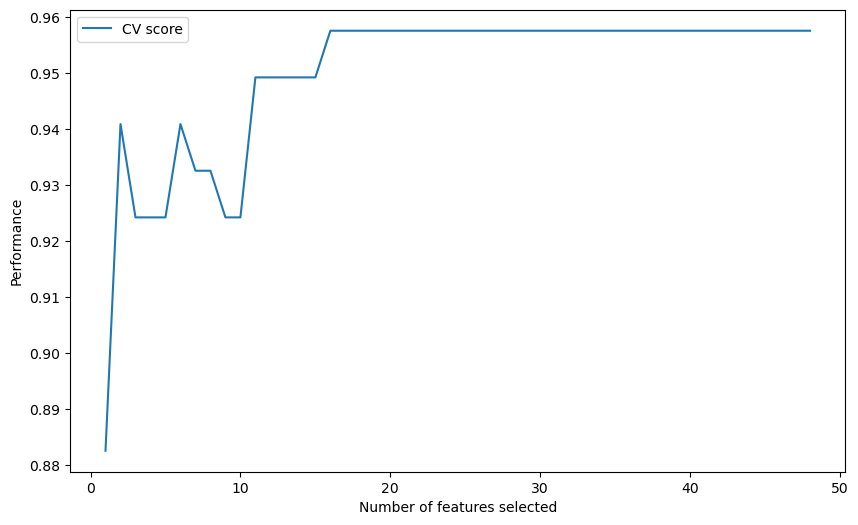

Column names of the best features:
Index(['AG', 'ALB', 'BUN', 'CA125', 'CA19-9', 'CL', 'CREA', 'DBIL', 'GLO',
       'GLU.', 'HE4', 'IBIL', 'MCH', 'Na', 'PCT', 'PHOS'],
      dtype='object')


In [126]:
# rfecv - all - xg
rfecv = RFECV(estimator=xg, step=1, cv=10, scoring='accuracy')

# Fit the RFECV object to the data
rfecv.fit(X, y)

# Plot the number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='CV score')
plt.legend(loc='best')
plt.show()

# Get the column names of the best features
best_features = X.columns[rfecv.support_]

# print the column names of the selected features
print("Column names of the best features:")
print(best_features)

In [127]:
# best_features = ['AG', 'BUN', 'CA125', 'CA19-9', 'CL', 'DBIL', 'GLO', 'GLU.', 'HE4',
#        'IBIL', 'PCT', 'PHOS', 'RDW']
best_features = ['AG', 'ALB', 'BUN', 'CA125', 'CA19-9', 'CL', 'CREA', 'DBIL', 'GLO',
       'GLU.', 'HE4', 'IBIL', 'MCH', 'Na', 'PCT', 'PHOS']
x_rfecv = X[best_features]
xs= scaler.fit_transform(x_rfecv)
x_rfecv

,AG,ALB,BUN,CA125,CA19-9,CL,CREA,DBIL,GLO,GLU.,HE4,IBIL,MCH,Na,PCT,PHOS
0,23.980000,39.9,3.21,219.8089,19.98000,100.1,45.0,2.6,32.1,7.170469,126.071034,4.2,26.2,142.0,0.30,1.09
1,16.600000,39.2,5.27,219.8089,18.41000,103.2,65.7,2.9,26.9,4.760000,126.071034,8.0,30.6,139.1,0.25,1.25
2,24.050000,50.4,5.05,39.8300,1.97000,103.5,68.0,2.3,26.6,5.670000,126.071034,5.1,30.4,144.7,0.24,1.17
3,23.290000,44.6,4.90,16.6500,58.78746,104.0,74.0,1.9,25.2,5.500000,96.470000,4.2,30.1,141.6,0.19,1.38
4,16.060000,45.6,2.25,219.8089,58.78746,106.6,49.0,1.4,34.0,4.940000,126.071034,3.0,28.4,146.9,0.30,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,19.620000,41.3,5.23,8.5400,4.31000,103.0,72.0,3.2,33.1,6.140000,61.080000,5.9,29.7,140.5,0.20,1.10
115,22.800000,45.4,5.49,5.1200,5.32000,101.4,56.0,3.5,25.5,5.540000,41.340000,7.2,31.6,143.3,0.24,1.11
116,9.500000,44.0,5.86,15.0600,32.68000,101.5,51.0,2.7,30.9,6.110000,55.230000,6.5,28.8,143.0,0.18,1.24
117,8.789439,45.7,5.31,17.7200,28.08000,102.5,73.0,3.4,34.2,5.390000,54.940000,7.4,30.2,144.2,0.22,0.93


In [128]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             4.142661
score_time           3.982923
test_accuracy       94.924242
test_recall         97.777778
test_specificity    83.333333
test_gmean          89.013537
test_roc            90.555556
test_precision      96.090909
test_mcc            84.197157
test_f1-score       96.830311
dtype: float64

# GA - RF

In [129]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

In [143]:
model=xg
from genetic_selection import GeneticSelectionCV
for i in range(10,30):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=20,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=10,
                                tournament_size=3,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(xs, y)
    genfeats = X.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['Ca', 'GLU.', 'HE4', 'PCT']
Chosen Feats:   ['CA125', 'GLU.', 'HE4', 'NEU', 'PCT']
Chosen Feats:   ['BUN', 'CA125', 'GLU.', 'HE4', 'RBC']
Chosen Feats:   ['CA125', 'CA19-9', 'GGT', 'HGB', 'PLT', 'TP']
Chosen Feats:   ['BUN', 'CA125', 'CA72-4', 'GLU.', 'HE4', 'MONO#']
Chosen Feats:   ['ALP', 'CA125', 'GLU.', 'HE4', 'NEU', 'PCT']
Chosen Feats:   ['CA125', 'GLU.', 'HE4', 'MCV', 'NEU', 'TP']
Chosen Feats:   ['BUN', 'CA125', 'EO#', 'GLU.', 'HE4', 'PCT', 'TBIL']
Chosen Feats:   ['CA125', 'DBIL', 'HE4', 'TP']
Chosen Feats:   ['BUN', 'CA125', 'GLU.', 'HE4', 'Na']
Chosen Feats:   ['AST', 'BUN', 'CA125', 'GLU.', 'HCT', 'HE4', 'MONO%', 'RBC']
Chosen Feats:   ['CA125', 'CA19-9', 'CREA', 'GLU.', 'HCT', 'MONO%', 'PHOS']
Chosen Feats:   ['CA125', 'CA19-9', 'DBIL', 'HCT', 'MONO%', 'PCT']
Chosen Feats:   ['BUN', 'CA125', 'GLU.', 'HE4', 'MPV']
Chosen Feats:   ['BUN', 'CA125', 'CA72-4', 'GLU.', 'HCT', 'HE4', 'MCV']
Chosen Feats:   ['BUN', 'CA125', 'GLU.', 'HCT', 'HE4', 'HGB']
Chosen Feat

In [145]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['ALP', 'CA125', 'GLU.', 'HE4', 'NEU', 'PCT']


In [146]:
report

,No of Feats,Chosen Feats,Scores
5,6,"[ALP, CA125, GLU., HE4, NEU, PCT]",0.95833
1,5,"[CA125, GLU., HE4, NEU, PCT]",0.95833
11,7,"[CA125, CA19-9, CREA, GLU., HCT, MONO%, PHOS]",0.95797
12,6,"[CA125, CA19-9, DBIL, HCT, MONO%, PCT]",0.95797
16,24,"[ALP, AST, BASO#, BASO%, Ca, CA125, CA19-9, CO...",0.95000
9,5,"[BUN, CA125, GLU., HE4, Na]",0.94964
2,5,"[BUN, CA125, GLU., HE4, RBC]",0.94964
3,6,"[CA125, CA19-9, GGT, HGB, PLT, TP]",0.94964
4,6,"[BUN, CA125, CA72-4, GLU., HE4, MONO#]",0.94964
6,6,"[CA125, GLU., HE4, MCV, NEU, TP]",0.94964


In [147]:
ga_feature = ['ALP', 'CA125', 'GLU.', 'HE4', 'NEU', 'PCT']

In [148]:
x_ga= X[ga_feature]
x_ga

,ALP,CA125,GLU.,HE4,NEU,PCT
0,95.0000,219.8089,7.170469,126.071034,76.500000,0.30
1,26.0000,219.8089,4.760000,126.071034,65.500000,0.25
2,76.0000,39.8300,5.670000,126.071034,70.900000,0.24
3,71.0000,16.6500,5.500000,96.470000,74.000000,0.19
4,128.8215,219.8089,4.940000,126.071034,70.800000,0.30
...,...,...,...,...,...,...
114,73.0000,8.5400,6.140000,61.080000,69.815125,0.20
115,55.0000,5.1200,5.540000,41.340000,81.714560,0.24
116,76.0000,15.0600,6.110000,55.230000,65.911381,0.18
117,83.0000,17.7200,5.390000,54.940000,67.789084,0.22


In [149]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)

In [150]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            121.443725
score_time           11.320691
test_accuracy        94.924242
test_recall          98.888889
test_specificity     80.000000
test_gmean           83.570226
test_roc             89.444444
test_precision       95.590909
test_mcc             81.615168
test_f1-score        96.980687
dtype: float64

In [151]:
report= pd.DataFrame()
nofeats=[]
chosen_feats=[]
cvscore=[]

In [166]:
model=xg
from genetic_selection import GeneticSelectionCV
for i in range(10,40):
    selector= GeneticSelectionCV(model, cv=5, scoring=make_scorer(accuracy_score), verbose=0,
                                max_features=i,
                                n_population=100,
                                crossover_proba=0.5,
                                mutation_proba=0.2,
                                n_generations=20,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.5,
                                n_gen_no_change=10,
                                tournament_size=3,
                                caching=True,
                                n_jobs=-1)
    selector = selector.fit(xs, y)
    genfeats = X.columns[selector.support_]
    genfeats = list(genfeats)
    print("Chosen Feats:  ", genfeats)

    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

Chosen Feats:   ['CA125', 'CA19-9', 'DBIL', 'HCT']
Chosen Feats:   ['BASO#', 'CA125', 'CL', 'LYM#', 'MONO%']
Chosen Feats:   ['BUN', 'CA125', 'GLU.', 'HE4', 'PCT']
Chosen Feats:   ['BUN', 'CA125', 'GLU.', 'HE4', 'RBC']
Chosen Feats:   ['AST', 'CA125', 'CA19-9', 'DBIL', 'GLU.', 'HGB', 'MONO#']
Chosen Feats:   ['BASO%', 'CA125', 'GLU.', 'HE4', 'Na', 'NEU']
Chosen Feats:   ['BUN', 'CA125', 'GLO', 'GLU.', 'HE4']
Chosen Feats:   ['BASO#', 'CA125', 'CL', 'GLU.', 'HCT', 'HGB', 'TBIL']
Chosen Feats:   ['BUN', 'Ca', 'CA125', 'GLU.', 'HE4']
Chosen Feats:   ['CA125', 'CA19-9', 'GLU.', 'HE4', 'MONO#', 'Na']
Chosen Feats:   ['BUN', 'CA125', 'GLU.', 'HE4', 'RBC']
Chosen Feats:   ['BUN', 'CA125', 'GLU.', 'HE4', 'RBC']
Chosen Feats:   ['CA125', 'GLU.', 'HE4', 'LYM%', 'Na']
Chosen Feats:   ['CA125', 'GLU.', 'HE4', 'LYM#', 'LYM%', 'MCV', 'Na']
Chosen Feats:   ['AST', 'BUN', 'CA125', 'CO2CP', 'GLU.', 'HE4']
Chosen Feats:   ['BUN', 'CA125', 'GLO', 'GLU.', 'HE4', 'IBIL']
Chosen Feats:   ['BUN', 'CA125', 'G

In [167]:
report["Scores"] = np.round(report["Scores"], 5)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

['BASO#', 'CA125', 'CL', 'GLU.', 'HCT', 'HGB', 'TBIL']


In [168]:
report

,No of Feats,Chosen Feats,Scores
7,7,"[BASO#, CA125, CL, GLU., HCT, HGB, TBIL]",0.95797
15,6,"[BUN, CA125, GLO, GLU., HE4, IBIL]",0.94964
16,9,"[BUN, CA125, GLU., HCT, HE4, IBIL, MPV, Na, TP]",0.94964
28,10,"[AFP, AG, ALT, CA125, CA19-9, GLU., HCT, LYM%,...",0.94964
27,10,"[BUN, CA125, CA19-9, CL, CREA, GLU., HE4, Na, ...",0.94964
26,12,"[ALP, BASO#, BUN, CA125, EO#, GLU., HCT, HE4, ...",0.94964
25,9,"[BASO#, BUN, CA125, DBIL, GLU., HE4, K, MCV, UA]",0.94964
24,9,"[BUN, CA125, CA72-4, EO#, GLU., HE4, LYM#, Mg,...",0.94964
23,11,"[ALT, BUN, CA125, CA72-4, CO2CP, GLU., HE4, HG...",0.94964
22,7,"[BUN, CA125, CL, GLU., HE4, LYM#, Na]",0.94964


In [169]:
ga_feature = ['BASO#', 'CA125', 'CL', 'GLU.', 'HCT', 'HGB', 'TBIL']

In [170]:
x_ga= X[ga_feature]
x_ga

,BASO#,CA125,CL,GLU.,HCT,HGB,TBIL
0,0.02,219.8089,100.1,7.170469,0.417,128.0,6.8
1,0.05,219.8089,103.2,4.760000,0.372,123.0,10.9
2,0.04,39.8300,103.5,5.670000,0.437,140.0,7.4
3,0.01,16.6500,104.0,5.500000,0.377,119.0,6.1
4,0.04,219.8089,106.6,4.940000,0.396,123.0,4.4
...,...,...,...,...,...,...,...
114,0.03,8.5400,103.0,6.140000,0.400,135.0,9.1
115,0.06,5.1200,101.4,5.540000,0.374,123.0,10.7
116,0.04,15.0600,101.5,6.110000,0.421,132.0,9.2
117,0.01,17.7200,102.5,5.390000,0.432,154.0,10.8


In [171]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)

In [172]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            122.514267
score_time            7.265487
test_accuracy        93.257576
test_recall          95.777778
test_specificity     83.333333
test_gmean           87.858778
test_roc             89.555556
test_precision       96.181818
test_mcc             80.507801
test_f1-score        95.697368
dtype: float64

In [175]:
ga_feature = ['CA125', 'CA19-9', 'RBC', 'HCT', 'K','MONO%', 'Na']

In [176]:
x_ga= X[ga_feature]
x_ga

,CA125,CA19-9,RBC,HCT,K,MONO%,Na
0,219.8089,19.98000,4.89,0.417,4.38,5.50,142.0
1,219.8089,18.41000,4.01,0.372,4.70,6.55,139.1
2,39.8300,1.97000,4.61,0.437,4.75,4.20,144.7
3,16.6500,58.78746,3.95,0.377,4.33,7.40,141.6
4,219.8089,58.78746,4.33,0.396,4.26,6.00,146.9
...,...,...,...,...,...,...,...
114,8.5400,4.31000,4.55,0.400,4.32,4.40,140.5
115,5.1200,5.32000,3.89,0.374,4.00,3.70,143.3
116,15.0600,32.68000,4.59,0.421,4.30,5.10,143.0
117,17.7200,28.08000,5.10,0.432,4.15,4.40,144.2


In [177]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_ga)

In [178]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

c:\Users\thani\anaconda3.x\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\thani\anaconda3.x\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\thani\anaconda3.x\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\thani\anaconda3.x\Lib\site-packages\xgboost\sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                  

fit_time            88.723125
score_time          10.812626
test_accuracy       92.424242
test_recall         97.654321
test_specificity    72.222222
test_gmean          73.484771
test_roc            84.938272
test_precision      94.090909
test_mcc            69.072184
test_f1-score       95.536881
dtype: float64

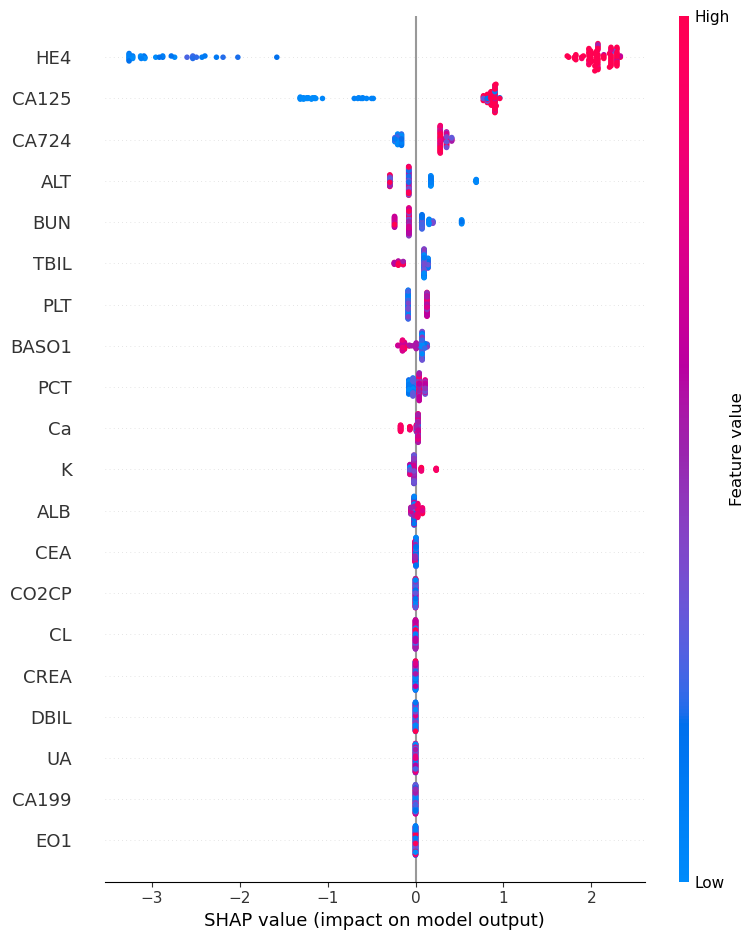

In [39]:
# Step 1: Fit the model
xg.fit(X_train, y_train)

# Step 2: Initialize SHAP explainer
explainer = shap.TreeExplainer(xg)

# Step 3: Get SHAP values
shap_values = explainer.shap_values(xs)

# Step 4: Plot feature importance based on SHAP values
shap.summary_plot(shap_values, X)


In [97]:
shap_feature = ['Age', 'HE4', 'CA125', 'CA724', 'ALT', 'BUN', 'TBIL', 'PLT', 'BASO1', 'PCT', 'Ca', 'K', 'ALB', 'CEA', 'CO2CP', 'CL', 'CREA', 'DBIL', 'UA', 'CA199', 'EO1']

In [98]:
x_shap= X[shap_feature]
x_shap

,Age,HE4,CA125,CA724,ALT,BUN,TBIL,PLT,BASO1,PCT,Ca,K,ALB,CEA,CO2CP,CL,CREA,DBIL,UA,CA199,EO1
0,61,126.071034,219.8089,12.120030,9.0,3.21,6.8,304.0,0.30,0.30,2.620000,4.38,39.9,2.460000,22.3,100.1,45.0,2.6,119.2,19.98000,0.500000
1,45,126.071034,219.8089,12.120030,16.0,5.27,10.9,339.0,0.74,0.25,2.350000,4.70,39.2,0.820000,24.0,103.2,65.7,2.9,215.6,18.41000,0.070000
2,76,126.071034,39.8300,3.710966,16.0,5.05,7.4,205.0,0.50,0.24,2.680000,4.75,50.4,3.450000,21.9,103.5,68.0,2.3,334.2,1.97000,3.157338
3,63,96.470000,16.6500,3.957770,14.0,4.90,6.1,215.0,0.20,0.19,2.350000,4.33,44.6,2.190000,23.0,104.0,74.0,1.9,325.2,58.78746,0.200000
4,65,126.071034,219.8089,12.120030,32.0,2.25,4.4,306.0,0.70,0.30,2.630000,4.26,45.6,3.427377,28.5,106.6,49.0,1.4,234.1,58.78746,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,65,61.080000,8.5400,3.728220,16.0,5.23,9.1,200.0,0.70,0.20,2.710000,4.32,41.3,2.770000,22.2,103.0,72.0,3.2,294.0,4.31000,2.600000
115,50,41.340000,5.1200,3.627316,18.0,5.49,10.7,214.0,0.60,0.24,2.630000,4.00,45.4,1.900000,23.1,101.4,56.0,3.5,266.7,5.32000,1.300000
116,67,55.230000,15.0600,4.338559,13.0,5.86,9.2,141.0,0.60,0.18,1.891785,4.30,44.0,4.040000,24.5,101.5,51.0,2.7,240.3,32.68000,1.300000
117,58,54.940000,17.7200,3.999032,12.0,5.31,10.8,187.0,0.20,0.22,1.891785,4.15,45.7,3.710000,19.9,102.5,73.0,3.4,373.4,28.08000,1.700000


In [99]:
scaler= StandardScaler()  
xs= scaler.fit_transform(x_shap)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2, random_state=42)

In [101]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [57]:
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             3.516552
score_time           3.577070
test_accuracy       93.257576
test_recall         95.666667
test_specificity    85.000000
test_gmean          85.985991
test_roc            90.333333
test_precision      96.000000
test_mcc            80.037148
test_f1-score       95.727554
dtype: float64

In [102]:
predictions = xg.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1])

In [103]:
out = predictions==y_test
out.value_counts()

TYPE
True     18
False     6
Name: count, dtype: int64

In [104]:
x_shap.iloc[[0]]

,Age,HE4,CA125,CA724,ALT,BUN,TBIL,PLT,BASO1,PCT,Ca,K,ALB,CEA,CO2CP,CL,CREA,DBIL,UA,CA199,EO1
0,61,126.071034,219.8089,12.12003,9.0,3.21,6.8,304.0,0.3,0.3,2.62,4.38,39.9,2.46,22.3,100.1,45.0,2.6,119.2,19.98,0.5


In [105]:
y

0      1
1      1
2      1
3      1
4      1
      ..
114    0
115    0
116    0
117    0
118    0
Name: TYPE, Length: 119, dtype: int64

In [106]:
y_test

56     1
89     0
4      1
45     1
26     1
117    0
69     1
10     1
90     1
73     1
18     1
112    0
11     1
96     1
42     1
31     1
88     0
0      1
97     1
110    0
64     1
40     1
95     1
53     1
Name: TYPE, dtype: int64

In [107]:
choosen_instance = x_shap.loc[[0]]
choosen_instance 

,Age,HE4,CA125,CA724,ALT,BUN,TBIL,PLT,BASO1,PCT,Ca,K,ALB,CEA,CO2CP,CL,CREA,DBIL,UA,CA199,EO1
0,61,126.071034,219.8089,12.12003,9.0,3.21,6.8,304.0,0.3,0.3,2.62,4.38,39.9,2.46,22.3,100.1,45.0,2.6,119.2,19.98,0.5


In [65]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(choosen_instance)
shap_values

array([[ 0.        ,  2.3011513 ,  0.7940878 ,  0.14685258, -0.07724021,
        -0.0751648 , -0.42173254,  0.13413432, -0.13338053,  0.04211026,
         0.        ,  0.06608021,  0.02367634,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.04047325,  0.        ,
         0.        ]], dtype=float32)

In [66]:
shap.initjs()
def p(j):
    explainer = shap.TreeExplainer(xg)
    xgb_binary_shap_values = explainer.shap_values(x_shap)
    return(shap.force_plot(explainer.expected_value, xgb_binary_shap_values[j,:], x_shap.iloc[j,:], link='logit'))

In [67]:
p(0)

In [108]:
choosen_instances = x_shap.loc[[114]]
choosen_instances 

,Age,HE4,CA125,CA724,ALT,BUN,TBIL,PLT,BASO1,PCT,Ca,K,ALB,CEA,CO2CP,CL,CREA,DBIL,UA,CA199,EO1
114,65,61.08,8.54,3.72822,16.0,5.23,9.1,200.0,0.7,0.2,2.71,4.32,41.3,2.77,22.2,103.0,72.0,3.2,294.0,4.31,2.6


In [109]:
explainer = shap.TreeExplainer(xg)
shap_value = explainer.shap_values(choosen_instances)
shap_value

array([[ 0.        ,  2.3011513 ,  0.7940878 ,  0.14685258, -0.07724021,
        -0.0751648 , -0.42173254,  0.13413432, -0.13338053,  0.04211026,
         0.        ,  0.06608021,  0.02367634,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.04047325,  0.        ,
         0.        ]], dtype=float32)

In [110]:
shap.initjs()
def p(j):
    explainer = shap.TreeExplainer(xg)
    xgb_binary_shap_values = explainer.shap_values(x_shap)
    return(shap.force_plot(explainer.expected_value, xgb_binary_shap_values[j,:], x_shap.iloc[j,:], link='logit'))

In [111]:
p(114)

In [118]:
# Initialize SHAP explainer for the trained model
explainer = shap.TreeExplainer(model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)


In [119]:
# Convert the model's log-odds output to probability using the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# SHAP force plot for premenopausal woman (high risk prediction)
patient_1 = 0  # Index of the first patient in the test set

# Calculate the log-odds to probability
f_x = sigmoid(explainer.expected_value + shap_values[patient_1].sum())

# Display the force plot with sigmoid-transformed values
shap.initjs()


In [121]:
# Convert test data to original form for easier readability
X_test_original = pd.DataFrame(X_test, columns=x_shap.columns)

In [125]:
# SHAP force plot for postmenopausal woman (high risk prediction)
patient_1 = 0  # Index of the first patient in the test set


# Plot the force plot for the specific patient
shap.force_plot(
    base_value=sigmoid(explainer.expected_value),  # Convert base value to probability
    shap_values=shap_values[patient_1],  # SHAP values remain as is
    features=X_test_original.iloc[patient_1],  # Input feature values for this patient
    link="logit"  # Specify the logit link to interpret results in probability space (0-1)
)


In [124]:
# SHAP force plot for postmenopausal woman (low risk prediction)
patient_2 = 1  # Index of the second patient in the test set
# Plot the force plot for the second patient
shap.force_plot(
    base_value=sigmoid(explainer.expected_value),  # Convert base value to probability
    shap_values=shap_values[patient_2],  # SHAP values remain as is
    features=X_test_original.iloc[patient_2],  # Input feature values for this patient
    link="logit"  # Interpret results in probability space (0-1)
)


In [127]:
# Get the model's predicted probabilities
pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (high risk)

# Find false positives (low-risk patients predicted as high-risk)
false_positives = (pred_proba > 0.5) & (y_test == 0)




In [130]:
# SHAP force plot for a false-positive prediction
false_positive_patient = false_positives.index[0]  # Get the first false-positive case
shap.force_plot(explainer.expected_value, shap_values[false_positive_patient], X_test_original.iloc[false_positive_patient])

IndexError: index 56 is out of bounds for axis 0 with size 24

In [134]:
import numpy as np
import pandas as pd
import shap
from IPython.display import display, HTML

# Initialize SHAP JavaScript visualization
shap.initjs()

# Get the model's predicted probabilities
pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (high risk)

# Get the actual predictions from the model (0 or 1)
pred_labels = model.predict(X_test)

# Calculate SHAP values for all patients
shap_values = explainer.shap_values(X_test)

# Normalize all SHAP values between 0 and 1
min_shap = np.min(shap_values)
max_shap = np.max(shap_values)

# Normalize the SHAP values
normalized_shap_values = (shap_values - min_shap) / (max_shap - min_shap)

# Convert test data to original form for easier readability
X_test_original = pd.DataFrame(X_test, columns=x_shap.columns)

# Example for a high-risk premenopausal woman
patient_1 = 0  # Index of the first patient in the test set
shap.force_plot(explainer.expected_value, normalized_shap_values[patient_1], X_test_original.iloc[patient_1])

# Example for a low-risk postmenopausal woman
patient_2 = 1  # Index of the second patient in the test set
shap.force_plot(explainer.expected_value, normalized_shap_values[patient_2], X_test_original.iloc[patient_2])

# Find false positives
false_positives = np.where((pred_labels == 1) & (y_test == 0))[0]  # indices of false positives in the test set

# Check if there are false positives
if len(false_positives) > 0:
    # Get the first false-positive case from the test set
    false_positive_patient = false_positives[0]  # Index within the test set
    
    # Display SHAP force plot for the false positive with normalized values
    shap_plot = shap.force_plot(
        explainer.expected_value,  # Base value for the model
        normalized_shap_values[false_positive_patient],  # Normalized SHAP values for this instance
        X_test_original.iloc[false_positive_patient]  # Feature values for this patient
    )
    
    # Render the plot inline (for Jupyter Notebooks)
    shap.save_html("shap_plot_false_positive.html", shap_plot)  # Save it as HTML
    display(HTML("shap_plot_false_positive.html"))  # Display it in the notebook

else:
    print("No false positives found in the test set.")


In [112]:
#inserting the model into pickle file 
pickle.dump(xg, open('OC_XG_post.pkl', 'wb'))

In [113]:
#inserting the model into pickle file 
with open('OC_XG_post.pkl','rb') as file:
    model = pickle.load(file)

In [114]:
x_shap.loc[[114]]

,Age,HE4,CA125,CA724,ALT,BUN,TBIL,PLT,BASO1,PCT,Ca,K,ALB,CEA,CO2CP,CL,CREA,DBIL,UA,CA199,EO1
114,65,61.08,8.54,3.72822,16.0,5.23,9.1,200.0,0.7,0.2,2.71,4.32,41.3,2.77,22.2,103.0,72.0,3.2,294.0,4.31,2.6


In [115]:
# Function to get user input and convert to the appropriate format
def get_user_data():
    print("Enter the following details:")
    
    Age = int(input("Age: "))
    HE4 = float(input("HE4(Human Epididymis Protein 4): "))
    CA125 = float(input("CA125 (Carbohydrate Antigen 125): "))
    CA724 = float(input("CA724 (Carbohydrate Antigen 72-4): "))
    ALT = float(input("ALT (Alanine Aminotransferase): "))
    BUN = float(input("BUN (Blood Urea Nitrogen): "))
    TBIL = float(input("TBIL (Total Bilirubin): "))
    PLT = float(input("PLT (Platelet Count): "))
    BASO1 = float(input("BASO1 (Basophil Cell Ratio): "))
    PCT = float(input("PCT (Thrombocytocrit): "))
    Ca= float(input("Ca (Calcium): "))
    K = float(input("K (Kalium): "))
    ALB = float(input("ALB (Albumin): "))
    CEA = float(input("CEA (Carcinoembryonic Antigen): "))
    CO2CP = float(input("CO2CP (Carbon Dioxide-combining Power): "))
    CL = float(input("CL (Chlorine): "))
    CREA = float(input("CREA (Creatinine): "))
    DBIL = float(input("DBIL (Direct Bilirubin): "))
    UA = float(input("UA (Uric Acid): "))
    CA199 = float(input("CA199 (Carbohydrate Antigen 19-9): "))
    EO1 = float(input("EO1 (Eosinophil Ratio): "))
    
    # Arrange the data as per the model's expected format
    person_data_values = [
        Age, HE4, CA125, CA724, ALT, BUN, TBIL, PLT, BASO1, PCT, Ca, K, ALB, CEA, CO2CP, CL, CREA, DBIL, UA, CA199, EO1
    ]

    return np.array(person_data_values).reshape(1, -1)

# Get user data
person_data_array = get_user_data()

# Predict using the model
prediction = model.predict(person_data_array)[0]

# Interpret the prediction
if prediction == 0:
    print("The model predicts that the women does not have ovarian cancer")
else:
    print("The model predicts that the women has ovarian cancer")

Enter the following details:
The model predicts that the women has ovarian cancer


ROMA Score

In [116]:
def calculate_roma(he4, ca125, menopausal_status):
    # Natural logarithm of HE4 and CA125
    ln_he4 = np.log(he4)
    ln_ca125 = np.log(ca125)
    
    # Calculate Predictive Index (PI) based on menopausal status
    if menopausal_status == 'pre':
        # Pre-menopausal PI formula
        PI = -12.0 + 2.38 * ln_he4 + 0.0626 * ln_ca125
        cut_off = 13.1  # Cut-off percentage for high risk in pre-menopausal
    elif menopausal_status == 'post':
        # Post-menopausal PI formula
        PI = -8.09 + 1.04 * ln_he4 + 0.732 * ln_ca125
        cut_off = 27.7  # Cut-off percentage for high risk in post-menopausal
    else:
        raise ValueError("Invalid menopausal status. Choose either 'pre' or 'post'.")
    
    # Calculate ROMA score
    roma_score = (np.exp(PI) / (1 + np.exp(PI))) * 100
    
    # Determine if the patient is at high risk
    if roma_score >= cut_off:
        risk_status = "High Risk"
    else:
        risk_status = "Low Risk"
    
    return roma_score, risk_status


In [117]:
# Example usage:
he4_value = 167.100000  # Example HE4 level
ca125_value = 219.808900 # Example CA125 level
menopausal_status = 'post'  # 'pre' for pre-menopausal, 'post' for post-menopausal

roma_score, risk = calculate_roma(he4_value, ca125_value, menopausal_status)

print(f"ROMA Score: {roma_score:.2f}%")
print(f"Risk Status: {risk}")

ROMA Score: 76.51%
Risk Status: High Risk
